In [10]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [11]:
N = 100                               
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)

In [12]:
sigma = numpy.loadtxt("NACA0012_sigma.txt")
x = numpy.loadtxt("NACA0012_x.txt")
y = numpy.loadtxt("NACA0012_y.txt")

In [13]:
u_inf = 1.0       
u_freestream = u_inf * numpy.ones((N, N))
v_freestream = numpy.zeros((N, N))
psi_freestream = u_inf * Y

In [14]:
strength_source = sigma                  
x_source = x
y_source = y 

u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))
psi_source = strength_source / (2 * numpy.pi) * numpy.arctan2((Y - y_source), (X - x_source))

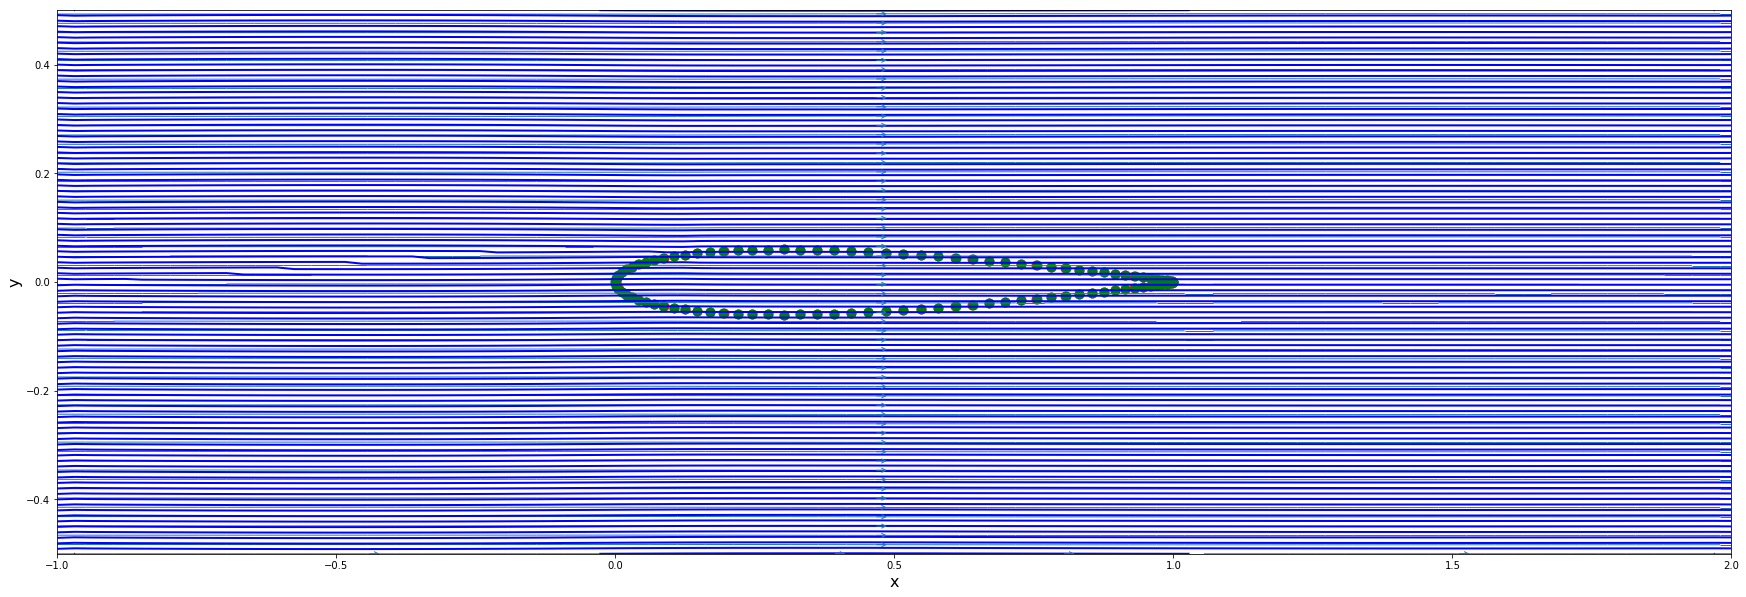

In [19]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')


x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source


pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')
pyplot.contour(X, Y, psi, 
               levels=numpy.linspace(-0.5, 0.5, N),
               colors='blue', linewidths=2, linestyles='solid');